In [1]:
# unsupervised
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

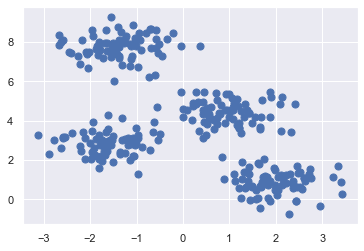

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

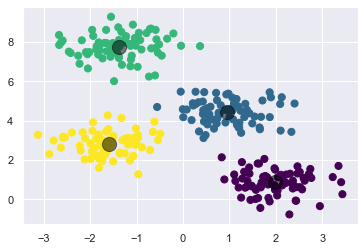

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

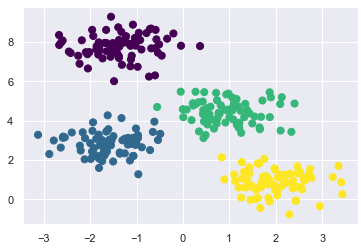

In [5]:
# k-mean algorithm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters] # Randomly permute a sequence, or return a permuted range, in this case, generate 4 numbers from 0-300

    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        # This function computes for each row in X, the index of the row of centers which is closest 

        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break

        # let centers become the mean
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4, rseed=5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [6]:
# the bondary will always be linear
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

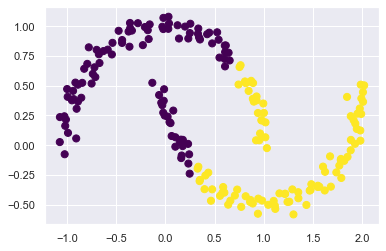

In [7]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

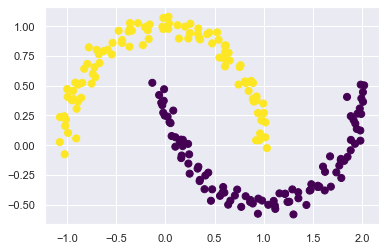

In [8]:
#  higher-dimensional representation of the data, 
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [10]:
# just use a subset of the data
# example 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape # 10 clusters in 64 dimensions, centers is the mean of the number images

(10, 64)

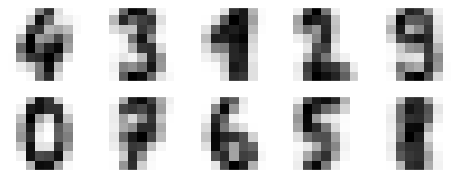

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [33]:
# we just clasify those numbers into 10 groups, but we do not know each group is belong to which number, we can find the most commen appeared digits.target in each cluster
from scipy.stats import mode
labels = np.zeros_like(clusters) # [0, 0, .... ]
for i in range(10):
    mask = (clusters == i)
    # The mode[0] is the value that occurs the most often in a data, if values occur same times, return the minimum one. mode[1] is the count
    labels[mask] = mode(digits.target[mask])[0] # give the cluster(which is the predicted model) which is i a label which is the most appeared digits.target in those cluster samples

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

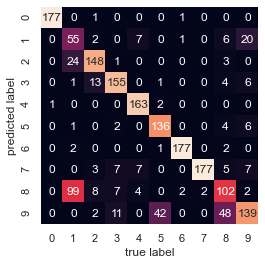

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
# we can essentially build a digit classifier without reference to any known labels

In [36]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

(427, 640, 3)

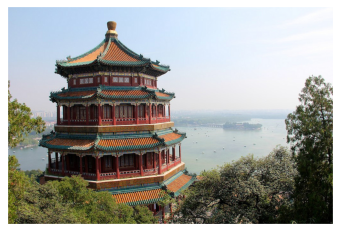

In [70]:
# Example 2: k-means for color compression
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.savefig('./figures/china16m.jpg');
china.shape

In [42]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [49]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i] # choose 10000 data as colors
    R, G, B = data[i].T  # one line do RGB data
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.') # color is  2-D array in which the rows are RGB
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

(273280, 3)


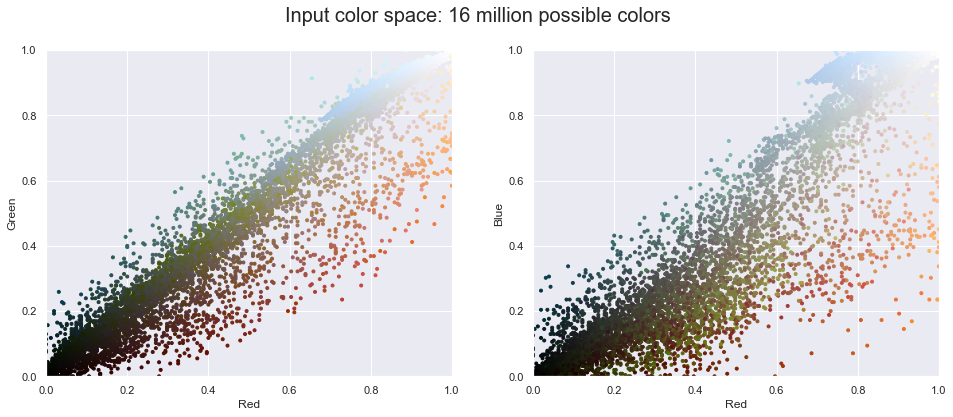

In [50]:
plot_pixels(data, title='Input color space: 16 million possible colors') # 255*255*255 = 16 million

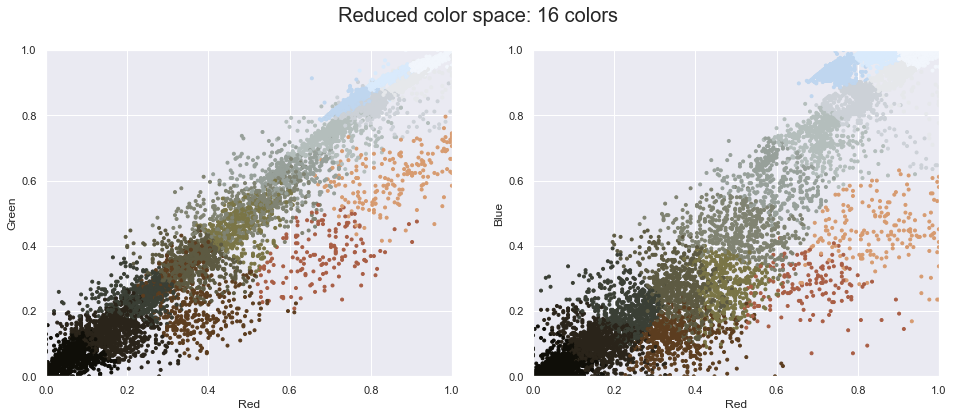

In [64]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data) # data is 3 dimension(RGB), 273280 samples 
# kmeans.cluster_centers_ is 16*3 array, kmeans.predict(data) is 273280 array with elements of 0-15
# returns a 2-D array, 273280*3, each row corresponing to its kmeans.predict(data) label, and itself is the center's RGB value, totally has 16 centers, and 16 different color
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# nre_colors is 273280 samples each with a number within 16 numbers
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

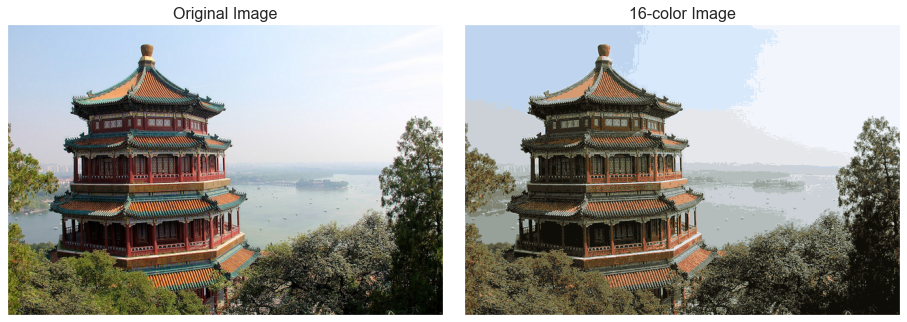

In [65]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

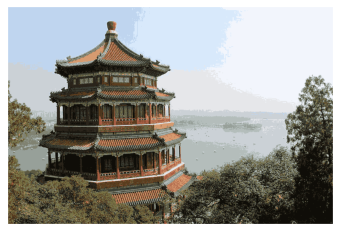

In [69]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.imshow(china_recolored)
plt.savefig('./figures/china16.jpg')